In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Input folder
df1 = pd.read_csv('..\Step0_dataCollection\April_11_data.csv')
df2 = pd.read_csv('..\Step0_dataCollection\Gender_Final.csv')
df3 = pd.read_csv('..\Step0_dataCollection\county_zipcode_true_ave.csv')

In [3]:
df1

,County,State,FIPS,Apr11_Cases,Apr11_Deaths
0,Autauga,Alabama,1001,19,1
1,Baldwin,Alabama,1003,66,1
2,Barbour,Alabama,1005,10,0
3,Bibb,Alabama,1007,13,0
4,Blount,Alabama,1009,12,0
...,...,...,...,...,...
2610,Sublette,Wyoming,56035,1,0
2611,Sweetwater,Wyoming,56037,7,0
2612,Teton,Wyoming,56039,53,0
2613,Uinta,Wyoming,56041,4,0


In [4]:
df1.rename(columns ={'FIPS': 'fips', 'County': 'county'}, inplace = True)

In [5]:
df2

,state,county,TOT_MALE,TOT_FEMALE,% TOT_MALE,% TOT_FEMALE,fips
0,Alabama,Autauga,26995,28606,48.551285,51.448715,1001
1,Alabama,Baldwin,105657,112365,48.461623,51.538377,1003
2,Alabama,Barbour,13133,11748,52.783248,47.216752,1005
3,Alabama,Bibb,11921,10479,53.218750,46.781250,1007
4,Alabama,Blount,28500,29340,49.273859,50.726141,1009
...,...,...,...,...,...,...,...
3104,Wyoming,Sweetwater,22152,20899,51.455251,48.544749,56037
3105,Wyoming,Teton,11909,11172,51.596551,48.403449,56039
3106,Wyoming,Uinta,10285,10014,50.667521,49.332479,56041
3107,Wyoming,Washakie,3988,3897,50.577045,49.422955,56043


In [6]:
df3 

,county_fips,county_name,state_id,population,pop_area_est,density
0,1001,Autauga,AL,57046,1512.03,37.73
1,1003,Baldwin,AL,207694,4077.05,50.94
2,1005,Barbour,AL,25278,1821.81,13.88
3,1007,Bibb,AL,22859,1415.86,16.14
4,1009,Blount,AL,45030,1311.39,34.34
...,...,...,...,...,...,...
3095,56037,Sweetwater,WY,44117,6322.20,6.98
3096,56039,Teton,WY,22196,6268.00,3.54
3097,56041,Uinta,WY,20630,3833.92,5.38
3098,56043,Washakie,WY,8295,3262.25,2.54


In [7]:
df3.rename(columns = {'county_fips':'fips','county_name':'county','state_id':'state' }, inplace = True)

In [8]:
df3.head()

,fips,county,state,population,pop_area_est,density
0,1001,Autauga,AL,57046,1512.03,37.73
1,1003,Baldwin,AL,207694,4077.05,50.94
2,1005,Barbour,AL,25278,1821.81,13.88
3,1007,Bibb,AL,22859,1415.86,16.14
4,1009,Blount,AL,45030,1311.39,34.34


In [9]:
df = pd.merge(df1,df3, on = ['fips','county'], how = 'inner')

In [10]:
df_final = pd.merge(df,df2, on = ['fips','county'], how = 'inner')

In [11]:
df_final

,county,State,fips,Apr11_Cases,Apr11_Deaths,state_x,population,pop_area_est,density,state_y,TOT_MALE,TOT_FEMALE,% TOT_MALE,% TOT_FEMALE
0,Autauga,Alabama,1001,19,1,AL,57046,1512.03,37.73,Alabama,26995,28606,48.551285,51.448715
1,Baldwin,Alabama,1003,66,1,AL,207694,4077.05,50.94,Alabama,105657,112365,48.461623,51.538377
2,Barbour,Alabama,1005,10,0,AL,25278,1821.81,13.88,Alabama,13133,11748,52.783248,47.216752
3,Bibb,Alabama,1007,13,0,AL,22859,1415.86,16.14,Alabama,11921,10479,53.218750,46.781250
4,Blount,Alabama,1009,12,0,AL,45030,1311.39,34.34,Alabama,28500,29340,49.273859,50.726141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,Sublette,Wyoming,56035,1,0,WY,9883,9894.89,1.00,Wyoming,5295,4518,53.959034,46.040966
2572,Sweetwater,Wyoming,56037,7,0,WY,44117,6322.20,6.98,Wyoming,22152,20899,51.455251,48.544749
2573,Teton,Wyoming,56039,53,0,WY,22196,6268.00,3.54,Wyoming,11909,11172,51.596551,48.403449
2574,Uinta,Wyoming,56041,4,0,WY,20630,3833.92,5.38,Wyoming,10285,10014,50.667521,49.332479


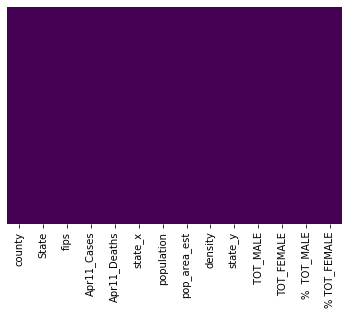

In [12]:
sns.heatmap(df_final.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [13]:
df_final.drop(columns = ['state_y','state_x', ' TOT_MALE', 'TOT_FEMALE', 'population'], inplace = True)

In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2576 entries, 0 to 2575
Data columns (total 9 columns):
county          2576 non-null object
State           2576 non-null object
fips            2576 non-null int64
Apr11_Cases     2576 non-null int64
Apr11_Deaths    2576 non-null int64
pop_area_est    2576 non-null float64
density         2576 non-null float64
%  TOT_MALE     2576 non-null float64
% TOT_FEMALE    2576 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 201.2+ KB


In [15]:
# sns.lmplot(x= 'population', y = 'cases', data = df_final)

In [15]:
from sklearn.model_selection import train_test_split

In [30]:
X = df_final.drop(['Apr11_Cases','county','State', 'fips'],axis=1)
y = df_final['Apr11_Cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state = 42)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [32]:
# from sklearn.svm import SVC

In [33]:
# svc_model = SVC(kernel = 'linear')
# svc_model.fit(X_train,y_train)

In [23]:
# model_svc.score(X_train_scaled, y_train)
# model_svc.score(X_test_scaled, y_test)

In [24]:
# print(f"Training Data Score: {model_svc.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {model_svc.score(X_test_scaled, y_test)}")

In [34]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

C:\Users\paulk\anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\paulk\anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
model_lr.score(X_train_scaled, y_train)
model_lr.score(X_test_scaled, y_test)

0.10766246362754607

In [36]:
print(f"Training Data Score: {model_lr.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model_lr.score(X_test_scaled, y_test)}")

Training Data Score: 0.11909385113268608
Testing Data Score: 0.10766246362754607


In [26]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'C':[1,5,10], 'penalty':['l2']}
# grid_lr = GridSearchCV(model_lr, param_grid)

In [27]:
# grid_lr.fit(X_train_scaled, y_train)

In [28]:
# print(grid_lr.best_params_)
# print(grid_lr.best_score_)